# Ford gobike Data Analysis
## by Babatunde Olaniyi





## Investigation Overview


> I'm most interested in investigating bike trip duration and  bike trip start time as dependent variables and its relationship with other variables in the dataset. I am also interested in investigating to see if there are certain bikes which are most commonly used by the users.



## Dataset Overview

> The data consists of information regarding approximately 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, customer type, and gender, as well as additional variables such as member's year of birth, start and end station name, start and end station longitude and latitude, start and end station unique id among others. About 8000 data points were removed from the analysis due to inconsistencies or missing information.


In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
# Changing data types of start_time and end_time colums

df["start_time"] = df["start_time"].astype('datetime64')
df["end_time"] = df["end_time"].astype('datetime64')

In [7]:
# Splitting the time stamp in the start_time coluimn into four components: 'year','month', 'day' and 'hour'

df['start_month'] = df.start_time.dt.month
df['start_day'] = df.start_time.dt.dayofweek
df['start_hour'] = df.start_time.dt.hour

In [10]:

# Creating a column for member age

df['member_age'] = 2019-df['member_birth_year']

In [11]:
# Replacing the int values in the start_day column with actual names of days of the week

df.loc[df["start_day"] == 0, "start_day"] = "Mon"
df.loc[df["start_day"] == 1, "start_day"] = "Tue"
df.loc[df["start_day"] == 2, "start_day"] = "Wed"
df.loc[df["start_day"] == 3, "start_day"] = "Thu"
df.loc[df["start_day"] == 4, "start_day"] = "Fri"
df.loc[df["start_day"] == 5, "start_day"] = "Sat"
df.loc[df["start_day"] == 6, "start_day"] = "Sun"

## The most popular bikes

> A plot of the ***TOP TEN*** bikes shows the most popular bikes among the bikes used for the bike sharing business. Bike with ID ***4794*** is the most popular.






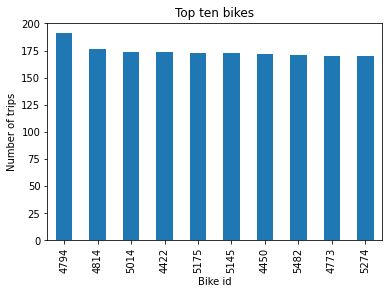

<Figure size 576x360 with 0 Axes>

In [12]:
#Defining a function for visualization of variables with highest counts

def var_count(df, var):
    plot = df[var].value_counts().nlargest(10).plot(kind='bar')
    plt.figure(figsize=[8,5])
    
    
# Bike Id disribution
plt.xlabel('Bike id')
plt.ylabel('Number of trips')
plt.title('Top ten bikes')
var_count(df, 'bike_id')

plt.show()

## Distribution of Bike trip start hours

> The time stamp in the start_time column was split to remove the date and create another column for Hours. Then a distribution of these hours was created to visualize the hours of the day with most bike rides with the peak ocurring between 17:00hrs and 18:00hrs.

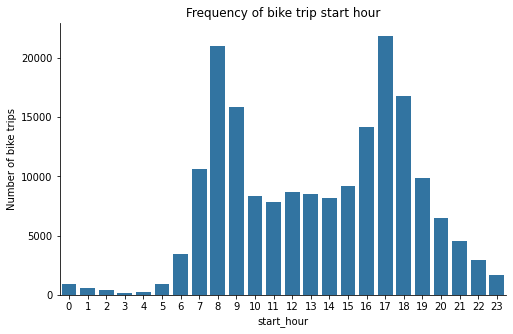

In [13]:
# bike ride start frequency per hours

def plot_frequency(hour, xlabel, ylabel, title):
    
    fig, ax = plt.subplots(figsize = [8,5])

    default_color = sb.color_palette()[0]
    sb.countplot(data = df, x = hour, color = default_color)
    plt.title(title)
    plt.ylabel(ylabel)
    sb.despine()


plot_frequency('start_hour', 'Start hour', 'Number of bike trips','Frequency of bike trip start hour')

## Relationship between member age, gender and bike trip duration
> The visuals shows that most users will likely do shorter duration trips below ***10000 seconds***.
>
> Younger users of ages 20 to 40 years are more likely to do long duration of bike trips. 
>
>The plot  also shows more saturation for the males and this implies that most users are males.



Text(0.5, 1.04, 'Relationship between member age, gender and bike trip duration')

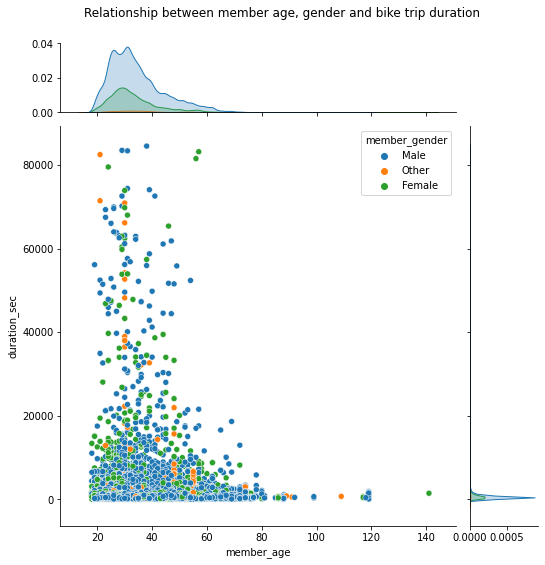

In [14]:
# Relationship between member age, gender and bike trip duration
sb.jointplot(x='member_age',y='duration_sec', data=df, height=7.5, hue='member_gender', marginal_ticks=True)
plt.suptitle('Relationship between member age, gender and bike trip duration', y=1.04)

## Relationship between trip duration, user type, gender and days of the week
> This shows an almost constant duration of trips for subscribers for mondays to fridays and a sharp increase in trip duration on week ends(saturdays and sundays) for subsribers.


<Figure size 432x288 with 0 Axes>

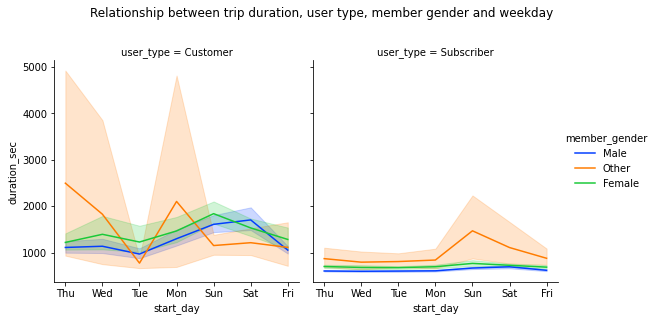

In [16]:
# Relationship between trip duration, user type, gender and days of the week
plt.suptitle('Relationship between trip duration, user type, member gender and weekday')
sb.relplot(x="start_day", y="duration_sec", data=df,palette='bright', height=4, kind='line', col='user_type', hue='member_gender');
plt.suptitle('Relationship between trip duration, user type, member gender and weekday',y=1.1)
plt.show()

In [17]:
!jupyter nbconvert Part_II_Project_3.ipynb --to slides --post serve --no-input --no-prompt

^C
